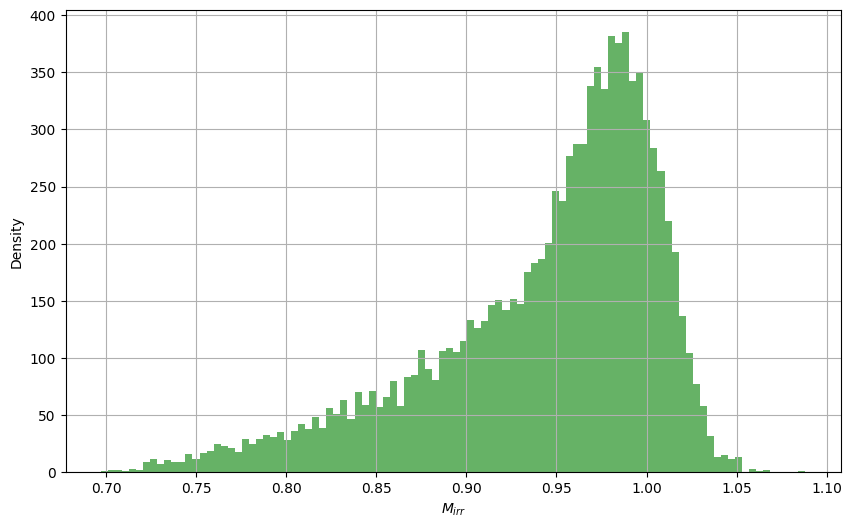

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def M_irr(spin, mass):
    return mass * np.sqrt((1 + np.sqrt(1 - spin**2)) / 2)

n_samples = 10000
mu = 1
sigma = 0.02
m_irr_values = []

for _ in range(n_samples):
    spin = random.uniform(0, 1)
    mass = random.gauss(mu, sigma)
    m_irr_values.append(M_irr(spin, mass))  

# plot histogram
plt.figure(figsize=(10, 6))
plt.hist(m_irr_values, bins=100, alpha=0.6, color='g')
plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.show()


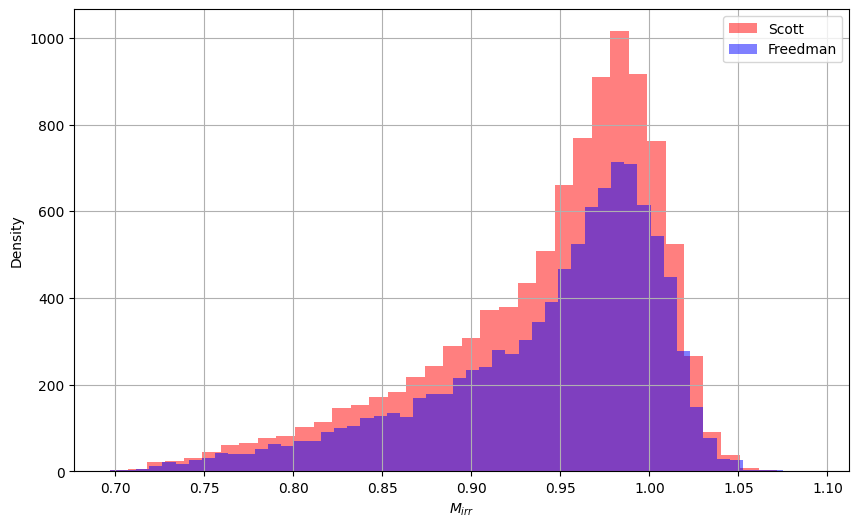

In [2]:
from astropy.visualization.hist import hist

plt.figure(figsize=(10, 6))
_ = hist(m_irr_values, bins="scott", alpha=0.5, color="red", label="Scott")
_ = hist(m_irr_values, bins="freedman", alpha=0.5, color="blue", label="Freedman")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()



21


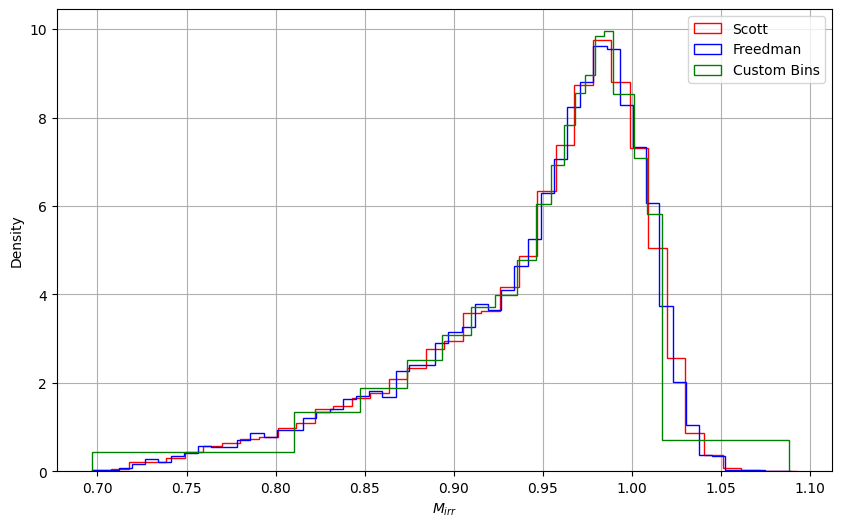

In [4]:
plt.figure(figsize=(10, 6))
# Use astropy's hist for all three histograms
_ = hist(m_irr_values, bins="scott",  histtype="step", density=True, color="red", label="Scott")
_ = hist(m_irr_values, bins="freedman",  histtype="step", density=True, color="blue", label="Freedman")

# Make sure you have enough bins (maybe use a different stride)
custom_bins = np.append(np.sort(m_irr_values)[::500], np.max(m_irr_values)) 
print(len(custom_bins))

# Use the same hist function for consistency
_ = hist(m_irr_values, bins=custom_bins,  histtype="step", density=True, color="green", label="Custom Bins")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()


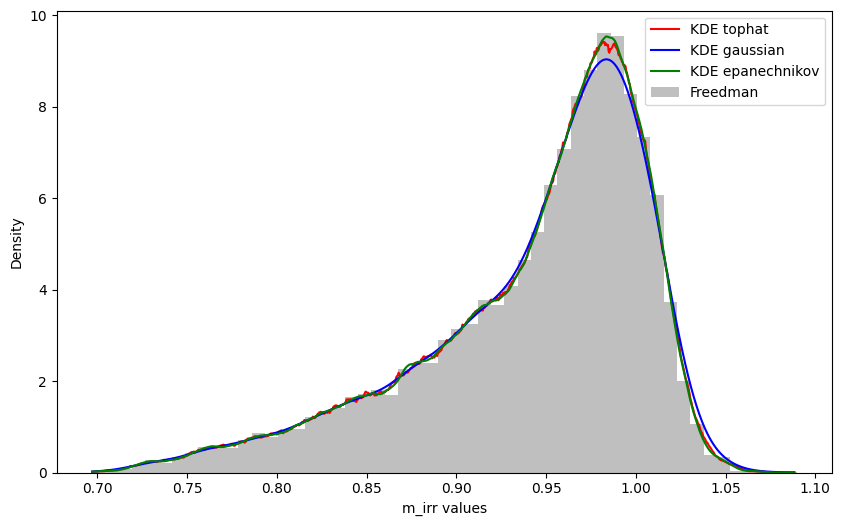

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

def kd_function(data, eval_points, bandwidth, kernel):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth) # data in 2D as input
    kde.fit(data[:, np.newaxis])
    log_density = kde.score_samples(eval_points[:, np.newaxis])
    return np.exp(log_density)

m_irr_values = np.array(m_irr_values)
# Create evaluation points evenly spaced across the range of your data
x_plot = np.linspace(m_irr_values.min(), m_irr_values.max(), 1000)

pdf_tophat = kd_function(m_irr_values, x_plot, 0.01, "tophat")
pdf_gaussian = kd_function(m_irr_values, x_plot, 0.01, "gaussian")
pdf_epanechnikov = kd_function(m_irr_values, x_plot, 0.01, "epanechnikov")

plt.figure(figsize=(10, 6))

plt.plot(x_plot.ravel(), pdf_tophat, color="red", label="KDE tophat")
plt.plot(x_plot.ravel(), pdf_gaussian, color="blue", label="KDE gaussian")
plt.plot(x_plot.ravel(), pdf_epanechnikov, color="green", label="KDE epanechnikov")
_ = hist(m_irr_values, bins="freedman", alpha=0.5, density=True, color="gray", label="Freedman")

plt.xlabel(r'$M_{irr}$')
plt.ylabel('Density')
plt.legend()
plt.show()